In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import np_utils, plot_model

In [ ]:
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_raw.shape

(60000, 28, 28)

In [ ]:
y_train_raw.shape

(60000,)

In [ ]:
X_test_raw.shape

(10000, 28, 28)

In [ ]:
 y_test_raw.shape

(10000,)

In [ ]:
X_train = X_train_raw/ 255.0
X_test = X_test_raw / 255.0

In [ ]:
y_train = np_utils.to_categorical(y_train_raw, 10)
y_test = np_utils.to_categorical(y_test_raw, 10)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


In [ ]:
X_train = X_train[:,:,:,np.newaxis]
X_test = X_test[:,:,:,np.newaxis]

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  
def class_name(i):
  return class_names[i]

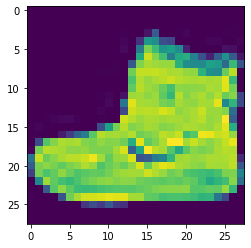

In [ ]:
plt.imshow(tf.squeeze(X_train[0]))

In [ ]:
class_name(y_test_raw[0])

'Ankle boot'

In [ ]:
%%capture
!pip install wandb

In [ ]:
import wandb
from wandb.keras import WandbCallback

wandb.login(key='df155689a5e91fac2beb79382a8cf29f64f1a3ab')

experiment_name = wandb.util.generate_id()
wandb.init(project="DZ9", group=experiment_name,)

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: luckin (use `wandb login --relogin` to force relogin)


In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

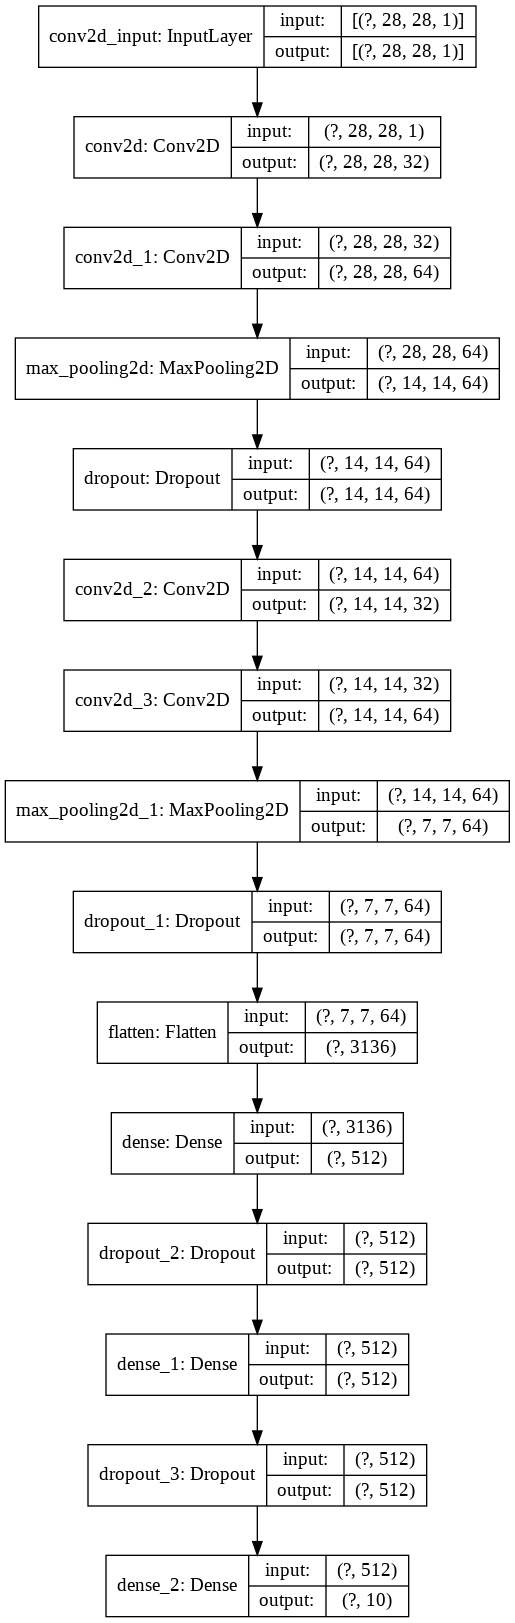

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[WandbCallback()])

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 0.5330 - accuracy: 0.8016 - val_loss: 0.3218 - val_accuracy: 0.8788
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 0.3095 - accuracy: 0.8880 - val_loss: 0.2649 - val_accuracy: 0.9022
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 0.2584 - accuracy: 0.9031 - val_loss: 0.2420 - val_accuracy: 0.9097
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 0.2314 - accuracy: 0.9152 - val_loss: 0.2287 - val_accuracy: 0.9140
Epoch 5/10
375/375 [==============================] - 5s 13ms/step - loss: 0.2074 - accuracy: 0.9240 - val_loss: 0.2158 - val_accuracy: 0.9222
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1909 - accuracy: 0.9287 - val_loss: 0.2014 - val_accuracy: 0.9294
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1718 - accuracy: 0.9362 - val_loss: 0.2064 - val_accuracy: 0.9253

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nТочность на проверочных данных:', test_acc)

313/313 - 1s - loss: 0.2046 - accuracy: 0.9303

Точность на проверочных данных: 0.9302999973297119


In [ ]:
import requests
from PIL import Image
from io import BytesIO
import PIL.ImageOps 

def resize_image(url):
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))
  img = img.convert('L')
  width, height = img.size
  square_side = min(width, height)
  img = img.crop((
    np.ceil((width - square_side) / 2),
    np.ceil((height - square_side) / 2),
    np.ceil((width + square_side) / 2),
    np.ceil((height + square_side) / 2)
  ))
  
  i_img = PIL.ImageOps.invert(img)
  
  i_img.thumbnail((28, 28))
  np_array = np.array(i_img) / 255

  return np_array

def data_photo(url):
  photo_array = resize_image(url)
  photo = photo_array[:,:,np.newaxis]
  plt.imshow(tf.squeeze(photo))
  return photo

array([[4.5437547e-03, 2.4059877e-05, 1.4047105e-04, 3.2859966e-03,
        1.1365173e-04, 1.4196796e-04, 8.0951536e-04, 9.5879406e-01,
        2.7743082e-03, 2.9372185e-02]], dtype=float32)

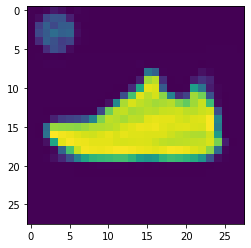

In [ ]:
model.predict(np.array([data_photo('https://static.baza.farpost.ru/v/1530966285461_block')]))

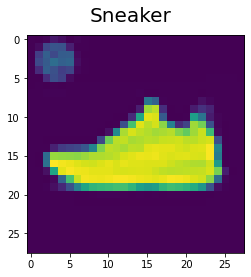

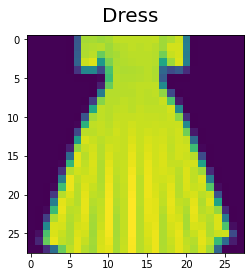

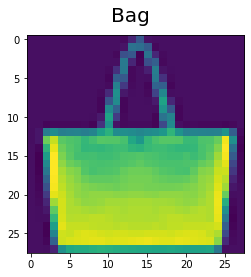

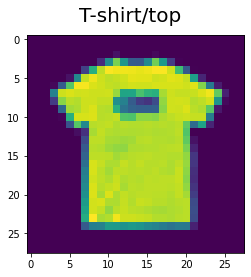

In [ ]:
urls = ['https://static.baza.farpost.ru/v/1530966285461_block',
        'https://sites.create-cdn.net/siteimages/28/4/9/284928/15/7/9/15798435/919x1208.jpg?1505296014',
        'https://cdn.yoox.biz/45/45489130kq_13_n_f.jpg',
        'https://cdnp3.stackassets.com/44d5ce4e25ef41b88dd840697f5473603c051e8e/store/b663a60730426f92476c8d450fde65c6959203c958d65a5dcf3a3fd7c6d6/12939_basic_tee_red.jpg',
        ]

for url in urls:
  #print(class_name(np.argmax(model.predict(np.array([data_photo(url)])))))
  fig = plt.figure()
  fig.suptitle(class_name(np.argmax(model.predict(np.array([data_photo(url)])))), fontsize=20)
  plt.imshow(tf.squeeze(data_photo(url)))
plt.show()